<a href="https://colab.research.google.com/github/BrendenLatham/Data_Viz/blob/main/Masters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Covid Curve

### Brenden Latham

### CPSMA 4313

### Dr. Nicholas Jacob

In [37]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [21]:
def truncate(number, decimals=0):
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)
    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [23]:
df = df[df['continent'].notna()]

I am going to be using the above data to recreate a graph comparing the current location of each country on it's pandemic curve relative to it's peak. It will examine the latest days reported new cases of covid-19 relative to the peak day of new cases

It will be a recreation of the similar graph located on this page https://graphics.reuters.com/world-coronavirus-tracker-and-maps/

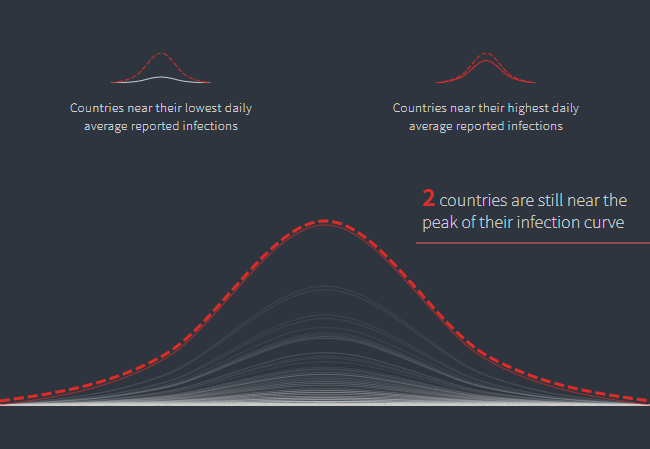

On the page it is an interactive graph with the countries name being displayed as you hover over it's curve. However I am attempting to create it in a static fassion

I beleive this graph is excellent for it's ability to compare contries relative to where they are in their covid outbreak in a simple and easy to understand format.

First I want to see all the columns in this dataset

In [24]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

This data is supposed to have been updated daily so I want to see the max new_cases for each country

In [25]:
maxes = df.groupby('location').new_cases.agg('max')
maxes.head()

location
Afghanistan    3243.0
Albania        4789.0
Algeria        2521.0
Andorra        2313.0
Angola         5035.0
Name: new_cases, dtype: float64

Now I want to actually see the latest report for each country

In [26]:
LatestReport = df.groupby('location').date.max()
LatestReport.head()

location
Afghanistan    2022-05-04
Albania        2022-05-04
Algeria        2022-05-04
Andorra        2022-05-04
Angola         2022-05-04
Name: date, dtype: object

If you look at all values it looks like some countries haven't been updated in a bit

I want to get a list of the countries that dont have yestardays data in

In [27]:
non_current = (x for x in LatestReport if x != max(LatestReport))
non_current_list = []
for i in non_current:
  non_current_list.append(LatestReport[LatestReport == i].index[0])
non_current_list

['Guam',
 'Guernsey',
 'Jersey',
 'Nauru',
 'Niue',
 'Northern Cyprus',
 'Northern Mariana Islands',
 'Pitcairn',
 'Guam',
 'Sint Maarten (Dutch part)',
 'Tokelau',
 'Turkmenistan',
 'Tuvalu',
 'Guam',
 'Western Sahara']

For these countries I will just use the most recent data

I will now create one dataframe that we will use for the graph

In [28]:
locations = df.location.unique()
locations

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [29]:
data1 = df.groupby('location', as_index = False).date.max()
data2 = df.groupby('location', as_index = False).new_cases.max().new_cases
data = pd.concat([data1,data2],axis = 1)
data.columns = ['location','date','max_new_cases']

In [30]:
data_to_join = df[['location','date','new_cases']]
data

,location,date,max_new_cases
0,Afghanistan,2022-05-04,3243.0
1,Albania,2022-05-04,4789.0
2,Algeria,2022-05-04,2521.0
3,Andorra,2022-05-04,2313.0
4,Angola,2022-05-04,5035.0
...,...,...,...
225,Wallis and Futuna,2022-05-04,47.0
226,Western Sahara,2022-04-20,NaN
227,Yemen,2022-05-04,287.0
228,Zambia,2022-05-04,5555.0


In [31]:
data = pd.merge(data, data_to_join, how = 'left', left_on = ['location','date'], right_on = ['location','date'])
data

,location,date,max_new_cases,new_cases
0,Afghanistan,2022-05-04,3243.0,0.0
1,Albania,2022-05-04,4789.0,20.0
2,Algeria,2022-05-04,2521.0,0.0
3,Andorra,2022-05-04,2313.0,368.0
4,Angola,2022-05-04,5035.0,0.0
...,...,...,...,...
225,Wallis and Futuna,2022-05-04,47.0,0.0
226,Western Sahara,2022-04-20,NaN,NaN
227,Yemen,2022-05-04,287.0,0.0
228,Zambia,2022-05-04,5555.0,0.0


In [32]:
data['percent_of_max'] = data.new_cases/data.max_new_cases
data.head()

,location,date,max_new_cases,new_cases,percent_of_max
0,Afghanistan,2022-05-04,3243.0,0.0,0.000000
1,Albania,2022-05-04,4789.0,20.0,0.004176
2,Algeria,2022-05-04,2521.0,0.0,0.000000
3,Andorra,2022-05-04,2313.0,368.0,0.159101
4,Angola,2022-05-04,5035.0,0.0,0.000000


Now lets drop any null values and reorder by percent of max

In [33]:
data.dropna(inplace=True)
data = data.sort_values('percent_of_max', ascending = False)
data.reset_index(drop=True, inplace=True)

Now for this next part I will need to sort the values by "percent of max"

Because there are so many countries, I will also select only a handfull of countries of interest to represent

In [34]:
interest = ['Taiwan','China','United States','Russia','Germany','Japan','France','South Korea','Saudi Arabia','United Arab Emirates','Israel','Canada','Australia','New Zealand','South Africa','France']
data = data[data['location'].isin(interest)]
data.reset_index(drop=True, inplace=True)

Now for the visualization. I will be commenting the adjustments and additions I make in the code for a smoother workflow

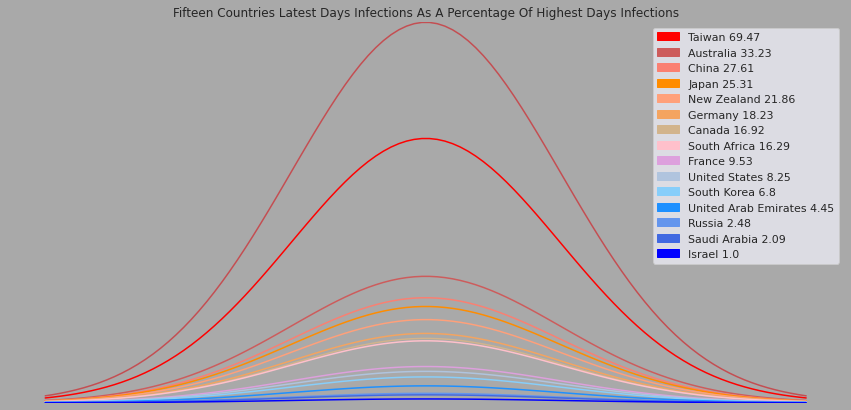

In [36]:
# First let's set some rules

x = np.linspace(-2,2,100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(title = 'Fifteen Countries Latest Days Infections As A Percentage Of Highest Days Infections')
fig.set_facecolor('darkgray')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.ylim(0,1)
plt.axis('off')
sns.set(rc={'figure.figsize':(15,7)})

# Now that the rules have been set, lets choose the colors

colors = ['red','indianred','salmon','darkorange','lightsalmon','sandybrown','tan','pink','plum','lightsteelblue','lightskyblue','dodgerblue','cornflowerblue','royalblue','blue','mediumblue']

# Now to actually get the data in here

for i in range(0,len(data['percent_of_max']),1):
  y = data['percent_of_max'][i]*np.e**(-1*x**2)
  plt.plot(x,y,color=colors[i])
y2 = np.e**(-1*x**2)
plt.plot(x,y2, color = 'r')

# And finally the legend

patches = []
for j in range(0,len(data['location']),1):
  patches.append(mpatches.Patch(color=colors[j], label = data['location'][j]+' '+str(truncate(100*data['percent_of_max'][j],2))))
plt.legend(handles=patches, bbox_to_anchor=(1, 1), loc='upper right', ncol=1)

# Let's see it

plt.show()

Just a heads up, everytime this code is ran it will give a different result because it is using the latest day's results.

Now Lets get the original down here to compare

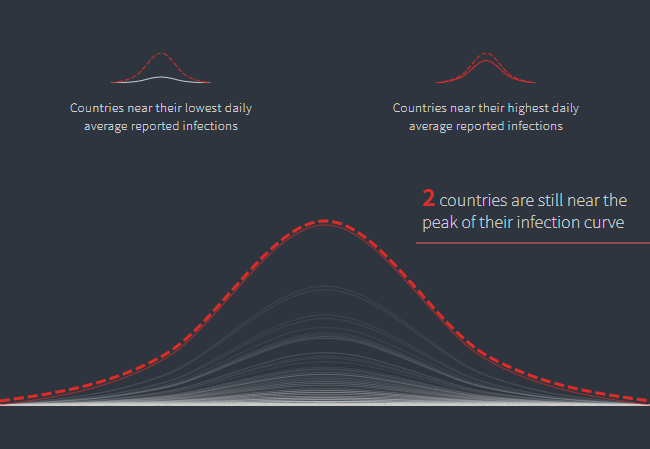

These visualizations aren't exactly the same, but I beleive I captured the essence of what makes it excellent. Any differece between the two was done for a reason, primarily to adapt it to a static format verses the dynamic interactive format it took on the website. The change in background color was for the sake of the colors used for the lines, which was in turn done for the sake of displaying which line corresponds to which country in a way not requiring user interaction. The only other difference then is the ammount of countries included, which also was a difference brought on by the need to display the information statically. I am proud of this visualization and have gained a better understanding of matplotlib while designing it, as well as a new appreciation for excellent graphs.